In [1]:

import geopandas
from geopandas import GeoDataFrame, GeoSeries
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
from shapely.geometry import Point, Polygon
import numpy as np
import googlemaps
from datetime import datetime
import json
plt.rcParams["figure.figsize"] = [8,6]


# The file here looks at all California Dept of Fires (CDF) data from 2020 onwards. Polygons are thus mostly limited to California.
#fires = GeoDataFrame.from_file('./Places/Places.shp')
#fires2 = GeoDataFrame.from_file('./forest_density/States.shp')
rivers = GeoDataFrame.from_file('./MajorRivers/MajorRivers.shp')

# Here's how the data is looking like, for reference.


C:\Users\eamen\anaconda3\lib\site-packages\geopandas\geodataframe.py:35: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  out = from_shapely(data)


In [2]:
! pip install descartes


In [47]:
print(fires.columns)


Index(['STFIPS', 'NAME00', 'TTLSML00', 'C00LASML', 'C00WASML', 'POPDEN00',
       'POP1990', 'POP2000', 'URBPOP00', 'URBPOP90', 'RURPOP00', 'RURPOP90',
       'PLCPOP00', 'PLCPOP90', 'URBLND00', 'URBLND90', 'RURLND00', 'RURLND90',
       'PLCLND00', 'PLCLND90', 'PORU00', 'PORU90', 'TTLRASAR', 'LNDRASAR',
       'WATRASAR', 'CANOPY', 'IMPRVS', 'TPGS', 'NAGS', 'TDEVELOP', 'TBARREN',
       'TFOREST', 'TSHRUB', 'TGRSSHRB', 'TAGRCLTR', 'TWETLND', 'DEVAGS',
       'DEVTPGS', 'DEVCAN', 'BARAGS', 'BARTPGS', 'BARCAN', 'FORAGS', 'FORTPGS',
       'FORCAN', 'SHBAGS', 'SHBTPGS', 'SHBCAN', 'GRSAGS', 'GRSTPGS', 'GRSCAN',
       'AGAGS', 'AGTPGS', 'AGCAN', 'WETAGS', 'WETTPGS', 'WETCAN', 'CANPER',
       'IMPPER', 'geometry'],
      dtype='object')


In [ ]:
import shapefile as shp  # Requires the pyshp package
import matplotlib.pyplot as plt

sf = shp.Reader("./MajorRivers/MajorRivers.shp")

plt.figure()
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
plt.show()

In [3]:
! pip install pyshp 

C:\Users\eamen\anaconda3\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\eamen\anaconda3\lib\site-packages\descartes\patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


<AxesSubplot:>

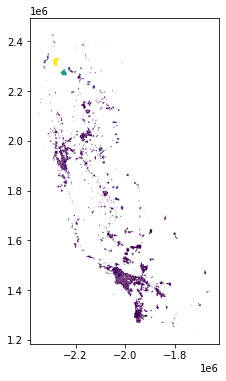

In [116]:
import descartes
# FID looks like just the row numbers given after the filtering done on the dept end - nothing useful 
# Object ID may take into account the fact that we have filtered the data (some get skipped here and there).
#fires = fires.set_index('TSHRUB')
#fires = fires.sort_index()
#fires = GeoDataFrame.from_file('./Places/Places.shp')
'''
print(fires.columns)
#fires = fires[fires['STFIPS'] == 7]
x = fires['STFIPS'].unique()
for i in x:
    print(i)
    m = fires[fires['STFIPS'] == i]
    n = fires2[fires2['STFIPS'] == i]
    m.plot(column = 'TFOREST')
    plt.title(str(i))
    n.plot()
    plt.title(str(i))
'''
california =  fires[fires['STFIPS'] == 6]
california.plot(column = 'TFOREST')
    
#Plot and color by map_method. In other words, provide different colors for different classifications (e.g. blue for GPS Ground, red for Infrared)
#Not really needed, but interesting to see, and we can use this later in our analysis if needed.
#fires.plot(column = 'TFOREST')


C:\Users\eamen\anaconda3\lib\site-packages\geopandas\plotting.py:187: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  segments = [np.array(linestring)[:, :2] for linestring in geoms]


(-123.891719, -121.939857)

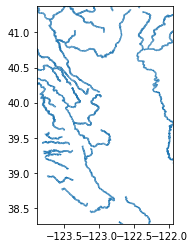

In [22]:
ax1 = rivers.plot()
ax1.set_ylim(38.272118, 41.372322)
ax1.set_xlim(-123.891719, -121.939857)

In [7]:
print(rivers.columns)

Index(['OBJECTID', 'GNIS_ID', 'DFGWATERID', 'Mouth_Lat', 'Mouth_Long', 'Name',
       'Down_Name', 'Down_ID', 'Mouth_Meas', 'Source_Mea', 'EditVersio',
       'EditNotes', 'EventAlert', 'NHD_Perman', 'Alternate_', 'Enabled',
       'NHD_Edit', 'Hydrologic', 'Hydrolog_1', 'Hydrolog_2', 'SHAPESTLen',
       'geometry'],
      dtype='object')


In [ ]:
import descartes
# FID looks like just the row numbers given after the filtering done on the dept end - nothing useful 
# Object ID may take into account the fact that we have filtered the data (some get skipped here and there).
#fires = fires.set_index('TSHRUB')
#fires = fires.sort_index()
print(fires.columns)
print(fires['STPLC'])
#Plot and color by map_method. In other words, provide different colors for different classifications (e.g. blue for GPS Ground, red for Infrared)
#Not really needed, but interesting to see, and we can use this later in our analysis if needed.
fires.plot(column = 'WETCAN')


Coordinates

In [5]:
%matplotlib agg
%matplotlib agg

# Bottom left corner
boundy1, boundx1 = 32.5239920572277, -124.38498819727948
# Top right corner (near top right of nevada to capture all of CA)
boundy2, boundx2 = 42.01477274871176, -114.13276715586254


plt.gca().set_xlim([boundx1, boundx2])
plt.gca().set_ylim([boundy1, boundy2])

# make a grid of latitude-longitude values
xmin, xmax, ymin, ymax = boundx1, boundx2, boundy1, boundy2

# Calculation to ensure length and width are uniform (squares appx., not rectangles)
# 400 squares width for the length of california (based on the above boundaries)
# Note here that xx, yy are for ALL OF california. Use xc, yc for the specific region.
granularity = 400
xx, yy = np.meshgrid(np.linspace(xmin,xmax,granularity), np.linspace(ymin,ymax, int(granularity/abs(xmax - xmin) * abs(ymax - ymin))))
print(xx.shape) # Again, xx, yy are rectangular grids on the entirety of CA (+ Nevada, ocean)

(370, 400)


In [6]:
# Rectangular Area to initially explore for project.
# Top Left
yurok_reservation_long = -123.891719
yurok_reservation_lat = 41.372322

# Bottom Right (travis air force base)
travis_long = -121.939857
travis_lat = 38.272118

# xx, yy above are all valid points we can explore in the future (the entire grid of points in California (+ ocean, to be filtered))
# Filter by locations that are contained within the region rectangle.
region_indcs = np.where(np.logical_and(np.logical_and(xx >= yurok_reservation_long, xx <= travis_long), np.logical_and(yy >= travis_lat, yy <= yurok_reservation_lat)))

xc = xx[region_indcs]
yc = yy[region_indcs]
print('# of Coordinates to explore in region: ' + str(len(xc)))

# of Coordinates to explore in region: 9196


In [23]:
# rivers nearby points
buffered_rivers = rivers.geometry.buffer(0.03)

C:\Users\eamen\anaconda3\lib\site-packages\geopandas\array.py:646: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for geom in self.data
C:\Users\eamen\anaconda3\lib\site-packages\geopandas\array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


In [16]:
print(buffered_rivers.shape)
print(rivers.geometry)

(41817,)
0        LINESTRING Z (-120.55223 41.30434 0.00000, -12...
1        LINESTRING Z (-121.44590 36.46387 0.00000, -12...
2        LINESTRING Z (-120.81381 35.83597 0.00000, -12...
3        LINESTRING Z (-120.75684 35.83039 0.00000, -12...
4        LINESTRING Z (-120.85913 35.75538 0.00000, -12...
                               ...                        
41812    LINESTRING Z (-120.14014 34.58282 0.00000, -12...
41813    LINESTRING Z (-120.44392 34.66823 0.00000, -12...
41814    LINESTRING Z (-120.46589 34.66894 0.00000, -12...
41815    LINESTRING Z (-120.48897 34.66802 0.00000, -12...
41816    LINESTRING Z (-120.08241 34.57842 0.00000, -12...
Name: geometry, Length: 41817, dtype: geometry


In [24]:
%matplotlib inline

# Now convert these points to geo-data - may take a few minutes to do at most.

# Credit -https://stackoverflow.com/questions/55199436/generate-grid-of-latitude-longitude-coordinates-that-fall-within-polygon
pts = GeoSeries([Point(x, y) for x, y in zip(xc, yc)])
in_map =  np.array([pts.within(geom) for geom in buffered_rivers]).sum(axis=0)
pts = GeoSeries([val for pos,val in enumerate(pts) if in_map[pos]])

pts.plot(markersize=1, figsize=(10,10))

C:\Users\eamen\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Users\eamen\anaconda3\lib\site-packages\geopandas\geoseries.py:133: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  data = from_shapely(s.values)


In [9]:
print(pts)
print(GeoSeries([Point(x, y) for x, y in zip(xc, yc)]))

GeoSeries([], dtype: geometry)


C:\Users\eamen\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Users\eamen\anaconda3\lib\site-packages\geopandas\geoseries.py:133: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  data = from_shapely(s.values)


0       POINT (-123.87109 38.28533)
1       POINT (-123.84540 38.28533)
2       POINT (-123.81970 38.28533)
3       POINT (-123.79401 38.28533)
4       POINT (-123.76831 38.28533)
                   ...             
9191    POINT (-122.04676 41.37177)
9192    POINT (-122.02107 41.37177)
9193    POINT (-121.99537 41.37177)
9194    POINT (-121.96968 41.37177)
9195    POINT (-121.94398 41.37177)
Length: 9196, dtype: geometry


-114.13276715586254 32.5239920572277


C:\Users\eamen\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Users\eamen\anaconda3\lib\site-packages\geopandas\geoseries.py:133: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  data = from_shapely(s.values)


-124.13276715586254 32.5239920572277


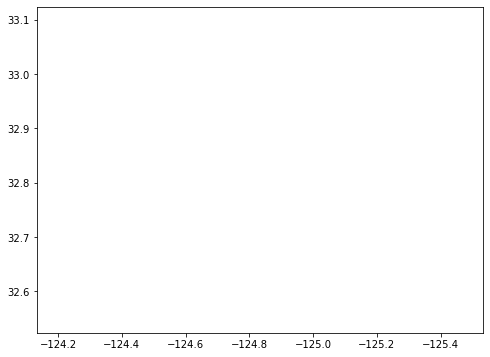

In [15]:
#California state boundaries

startx = -114.13276715586254
endx = -124.38498819727948
starty = 32.5239920572277
endy = 42.01477274871176

result = []

for x in np.arange(startx, endx, -10):
    boundx1 = x
    boundx2 = x - 1.4
    for y in np.arange(starty, endy, 10):
        print(x,y)
        boundy1 = y
        boundy2 = y + 0.6
        
        plt.gca().set_xlim([boundx1, boundx2])
        plt.gca().set_ylim([boundy1, boundy2])

# make a grid of latitude-longitude values
        xmin, xmax, ymin, ymax = boundx1, boundx2, boundy1, boundy2
        xx, yy = np.meshgrid(np.linspace(xmin,xmax,50), np.linspace(ymin,ymax,50))
        xc = xx.flatten()
        yc = yy.flatten()

# Now convert these points to geo-data - may take a few minutes to do at most.
        pts = GeoSeries([Point(x, y) for x, y in zip(xc, yc)])
        in_map =  np.array([pts.within(geom) for geom in rivers.geometry]).sum(axis=0)
        pts = GeoSeries([val for pos,val in enumerate(pts) if in_map[pos]])


# We now have the points.

# (Reformat strings if needed to another type than the one given below - format rn is "Lat,Long")
        
        for n, point in enumerate(pts):
            c = []
            coords = [','.join(__ for __ in _.strip().split(' ')[::-1]) for _ in str(point).split('(')[1].split(')')[0].split(',')]
            coords = coords[0].split(',')
            c.append(float(coords[0]))
            c.append(float(coords[1]))
            result.append(c)


In [41]:
with open('coords.json', 'w') as f:
    json.dump(result, f)

1521
